In [79]:
import pandas as pd
import re
import plotly.graph_objects as go

# Funkcja do usunięcia litery na końcu wartości
def remove_last_character(value):
    pattern = r'\D$'  # Wzorzec do dopasowania ostatniego niecyfrowego znaku
    return re.sub(pattern, '', value)

# Wczytanie danych z pliku CSV
data = pd.read_csv('men_100m.csv')

# Konwersja kolumny 'Event Date' na typ daty
data['Event Date'] = pd.to_datetime(data['Event Date'], format='%d.%m.%Y')

# Usunięcie litery na końcu wartości w kolumnie 'Time'
data['Time'] = data['Time'].apply(remove_last_character)

# Konwersja kolumny 'Time' na liczbę zmiennoprzecinkową
data['Time'] = data['Time'].str.replace(',', '.').astype(float)

# Dodanie nowej kolumny 'Year' na podstawie kolumny 'Event Date'
data['Year'] = data['Event Date'].dt.year

# Filtrowanie danych od roku 1975
data = data[data['Year'] >= 1975]

# Grupowanie danych według roku i wybór najlepszego wyniku dla każdego roku
best_results = data.groupby('Year')['Time'].min()

# Tworzenie wykresu za pomocą Plotly
fig = go.Figure()

# Tworzenie słownika przypisującego kolor dla każdego zawodnika
colors = {
    'Usain Bolt': 'green',
    'Carl Lewis': 'red',
    'Robert Hayes': 'blue',
    'Jim Hines': 'orange',
    'Valeriy Borzov': 'purple',
    'Steve Riddick': 'cyan',
    'Hasely Crawford': 'magenta',
    'Silvio Leonard': 'lime',  
    'Clancy Edwards': 'yellow',
    'Pietro Mennea': 'pink',
    'James Sanford': 'brown',
    'Calvin Smith': 'gray',  
    'Mel Lattany': 'indigo',
    'Chidi Imoh': 'teal',
    'Leroy Burrell': 'olive',
    'Michael Marsh': 'navy',
    'Linford Christie': 'maroon',
    'Donovan Bailey': 'silver',
    'Maurice Greene': 'aqua',
    'Ato Boldon': 'fuchsia',
    'Justin Gatlin': 'gold',
    'Asafa Powell': 'violet',
    'Tyson Gay': 'salmon',
    'Christian Coleman': 'lightblue',
    'Michael Norman': 'black',
    'Trayvon Bromell': 'khaki',
    'Fred Kerley': 'lightgray',
    'Ferdinand Omanyala': 'tomato',
    'Patrick Johnson': 'brown',  
}


# Dodawanie punktów dla najlepszych wyników w każdym roku
for year, time in best_results.items():
    athlete_data = data.loc[(data['Year'] == year) & (data['Time'] == time)]
    athlete = athlete_data['Athlete'].values[0]
    country = athlete_data['Country'].values[0]
    color = colors.get(athlete, 'gray')
    label = f"Zawodnik: {athlete}<br>Rok: {int(year)}<br>Czas: {time} s<br>Kraj: {country}"
    fig.add_trace(go.Scatter(
        x=[year],
        y=[time],
        mode='markers',
        name=athlete,
        text=[label],
        hovertemplate='%{text}<extra></extra>',
        marker=dict(color=color, size=15),  # Zwiększenie rozmiaru kulek
    ))

# Dodawanie prostokąta 1
fig.add_shape(
    type="rect",
    x0=1981,
    y0=9.5,
    x1=1991,
    y1=10.5,
    fillcolor="rgba(255, 0, 0, 0.2)",
    line=dict(color='rgba(255, 0, 0, 0.2)'),
    opacity=0.5,
    layer="below",
    xref='x',
    yref='y'
)

# Dodawanie prostokąta 2
fig.add_shape(
    type="rect",
    x0=2008,
    y0=9.5,
    x1=2013,
    y1=10.5,
    fillcolor="rgba(0, 255, 0, 0.2)",
    line=dict(color='rgba(0, 255, 0, 0.2)'),
    opacity=0.5,
    layer="below",
    xref='x',
    yref='y'
)

# Konfiguracja układu wykresu
fig.update_layout(
    xaxis=dict(title='Rok'),
    yaxis=dict(title='Najlepszy czas (s)'),
    title='Najlepszy wynik w biegu na 100 m',
    showlegend=True,
)

# Ustawienie skalowania osi Y
fig.update_yaxes(range=[9.5, 10.2])

# Zapisywanie wykresu do pliku HTML
fig.write_html('best_of_every_season.html')





In [72]:
import plotly.graph_objects as go
import pandas as pd
import networkx as nx
import random

data = {
    'Country': ['USA', 'JAM', 'GBR', 'TTO', 'CAN', 'NGR', 'RSA', 'FRA', 'SKN', 'JPN'],
    'Count': [1555, 696, 236, 187, 148, 146, 121, 109, 80, 78],
    'Picture': ['US.png', 'JM.png', 'GB.png', 'TT.png', 'CA.png', 'NG.png', 'ZA.png', 'FR.png', 'KN.png', 'JP.png']
}

# Wczytanie danych do DataFrame
df = pd.DataFrame(data)

# Tworzenie figury
fig = go.Figure()

# Tworzenie grafu
G = nx.Graph()

# Dodawanie wierzchołków do grafu
for i, row in df.iterrows():
    G.add_node(i)

# Generowanie losowego rozkładu kulek
pos = nx.spring_layout(G, iterations=2000, scale=0.5, seed=42)

# Dodawanie markerów z obrazkami i etykietami
for i, row in df.iterrows():
    x, y = pos[i]

    fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers',
        marker=dict(
            size=30 * row['Count'] * 0.01,
            opacity=0.7,
            symbol='circle',
            color='rgba(0, 0, 0, 0)',
        ),
        hovertext=[f'Country: {row["Country"]}, Count: {row["Count"]}'],
        hoverinfo='text',
    ))
    fig.add_layout_image(
        dict(
            source=f"https://raw.githubusercontent.com/matahombres/CSS-Country-Flags-Rounded/master/flags/{row['Picture']}",
            xref="x",
            yref="y",
            x=x,
            y=y,
            sizex=0.001 * row['Count'],  # Mnożenie wartości Count przez 0.1
            sizey=0.001 * row['Count'],  # Mnożenie wartości Count przez 0.1
            xanchor="center",
            yanchor="middle",
            opacity=1,
            layer="above"
        )
    )

# Aktualizowanie osi x
fig.update_xaxes(showgrid=False, zeroline=False, showticklabels=False)

# Aktualizowanie osi y
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)

# Aktualizowanie układu wykresu
fig.update_layout(
    width=1600,
    height=800,
    plot_bgcolor="white",
    showlegend=False
)

# Zapisywanie wykresu do pliku HTML
fig.write_html("country_bubbles.html")



In [93]:
import pandas as pd
import plotly.express as px

# Funkcja do usunięcia litery na końcu wartości
def remove_last_character(value):
    pattern = r'\D$'  # Wzorzec do dopasowania ostatniego niecyfrowego znaku
    return re.sub(pattern, '', value)

# Wczytanie danych z pliku CSV
data = pd.read_csv('men_100m.csv')

# Konwersja kolumny 'Event Date' na typ daty
data['Event Date'] = pd.to_datetime(data['Event Date'], format='%d.%m.%Y')

# Usunięcie litery na końcu wartości w kolumnie 'Time'
data['Time'] = data['Time'].apply(remove_last_character)

# Konwersja kolumny 'Time' na liczbę zmiennoprzecinkową
data['Time'] = data['Time'].str.replace(',', '.').astype(float)

# Sortowanie wyników względem daty i czasu
data = data.sort_values(by=['Event Date', 'Time'])

# Inicjalizacja pustej listy do przechowywania najlepszych wyników
best_results = []

# Ustalenie daty początkowej
start_date = pd.to_datetime('1968-10-14', format='%Y-%m-%d')

# Przeszukiwanie posortowanych danych w celu znalezienia progresji rekordu świata
current_best_time = float('inf')
for _, row in data.iterrows():
    if row['Event Date'] >= start_date:
        if row['Time'] < current_best_time:
            best_results.append(row)
            current_best_time = row['Time']

# Konwersja listy wyników do DataFrame
best_results = pd.DataFrame(best_results)

# Tworzenie wykresu punktowego
fig = px.scatter(best_results, x='Event Date', y='Time', title='Progresja rekordu świata - 100m mężczyzn')
fig.update_traces(mode='markers+lines')  # Dodanie linii łączących punkty

# Zapisywanie wykresu do pliku HTML
fig.write_html("WR_progression.html")



In [97]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(-1, 1)
point, = ax.plot([], [], 'ro', markersize=10)

def update(frame):
    x = frame / 9.0 * 10
    y = 0
    point.set_data(x, y)
    return point,

animation = FuncAnimation(fig, update, frames=100, interval=1000/11, blit=True)

# Zapisywanie animacji jako pliku GIF
animation.save('animation.gif', writer='pillow')

plt.show()


<IPython.core.display.Javascript object>

##### DEVELOPMENT, GRAPH ZROBIONY PRZEZ MARIUSZA ######

[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 40]


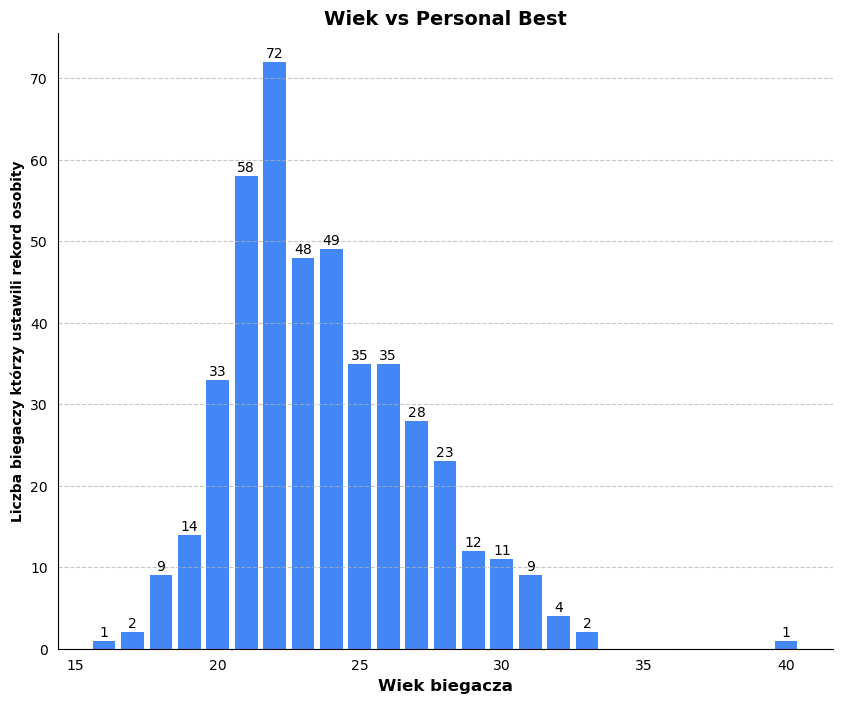

In [2]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

def calculate_age(birth_date, event_date):
    birth_date = datetime.strptime(birth_date, "%d.%m.%y")
    event_date = datetime.strptime(event_date, "%d.%m.%Y")
    
    birth_year = birth_date.year
    event_year = event_date.year
    
    if birth_year > 2010:
        birth_year = birth_year - 100
    
    age = event_year - birth_year
    if event_date.month < birth_date.month or (event_date.month == birth_date.month and event_date.day < birth_date.day):
        age -= 1
    return age


def remove_last_character(value):
    pattern = r'\D$'  # Wzorzec do dopasowania ostatniego niecyfrowego znaku
    return re.sub(pattern, '', value)


# Wczytanie danych z pliku CSV
data = pd.read_csv('men_100m.csv')

# Usunięcie litery na końcu wartości w kolumnie 'Time'
data['Time'] = data['Time'].apply(remove_last_character)

# Konwersja kolumny 'Time' na liczbę zmiennoprzecinkową
data['Time'] = data['Time'].str.replace(',', '.').astype(float)

# Find the best time for each athlete
best_times = data.groupby('Athlete')['Time'].min()

all_ages = []
# Iterate over the athletes and their best times
for athlete, best_time in best_times.items():
    athlete_data = data[(data['Athlete'] == athlete) & (data['Time'] == best_time)]
    
    birth_date = athlete_data['Date of Birth'].values[0]
    event_date = athlete_data['Event Date'].values[0]

    # Check if birth_date or event_date is empty or not a valid date
    if pd.isnull(birth_date) or pd.isnull(event_date) or not isinstance(birth_date, str) or not isinstance(event_date, str):
        continue
    
    try:
        age = calculate_age(birth_date, event_date)
        all_ages.append(age)
    except ValueError:
        continue



unique_values, frequencies = np.unique(all_ages, return_counts=True)
value_to_delete = 83

# Find the index of the value to delete
# błąd na stronie, źle zostało wpisane, inaczej gośc by miał 83 lata
# reszta jest git
index_to_delete = np.where(unique_values == value_to_delete)[0]
unique_values = np.delete(unique_values, index_to_delete)
print(unique_values)

frequencies = np.delete(frequencies, 19)


#robimy wykres
plt.figure(figsize=(10, 8))

# Set the color scheme
bar_color = '#4287f5'

# Create the bar chart
plt.bar(unique_values, frequencies, color=bar_color)

# Set the x-axis label and font properties
plt.xlabel('Wiek biegacza', fontsize=12, fontweight='bold')

# Set the y-axis label and font properties
plt.ylabel('Liczba biegaczy którzy ustawili rekord osobity', fontsize=10, fontweight='bold')

# Set the chart title and font properties
plt.title('Wiek vs Personal Best', fontsize=14, fontweight='bold')

# Customize the gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the tick parameters
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels to the bars
for i, v in enumerate(frequencies):
    plt.text(unique_values[i], v + 0.2, str(v), ha='center', va='bottom')

# Show the plot
plt.show()